# DATA EXPLORATION AND VISUALIZATION

TEAM: Abraham Borg, Sarom Thin, Mehar Rekhi, Cristian Vazquez

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
from matplotlib import rcParams
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# allow output to span multiple output lines in the console
pd.set_option('display.max_columns', 500)

# switch to seaborn default stylistic parameters
# see the useful https://seaborn.pydata.org/tutorial/aesthetics.html

sns.set()
sns.set_context('paper') # 'talk' for slightly larger

# change default plot size
rcParams['figure.figsize'] = 9,7

In [2]:
# code in this cell from: 
# https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to display/hide the code."></form>''')

Get PKL file with chess data from this link, https://github.com/abecsumb/DataScienceProject/blob/main/chess_data.pkl?raw=true

In [3]:
# read pkl file from local folder. The file contains the dataframe.
chess_data = pd.read_pickle('https://github.com/abecsumb/DataScienceProject/blob/main/chess_data.pkl?raw=true', compression = 'zip')

In [4]:
chess_data.head()

,Date,Game Result,W-ELO,B-ELO,Num Moves,W1,B1,W2,B2,W3,B3,W4,B4,W5,B5,W6,B6,W7,B7,W8,B8,W9,B9,W10,B10,W11,B11,W12,B12,W13,B13,W14,B14,W15,B15,W16,B16,W17,B17,W18,B18,W19,B19,W20,B20,W21,B21,W22,B22,W23,B23,W24,B24,W25,B25,W26,B26,W27,B27,W28,B28,W29,B29,W30,B30,W31,B31,W32,B32,W33,B33,W34,B34,W35,B35,W36,B36,W37,B37,W38,B38,W39,B39,W40,B40,W41,B41,W42,B42,W43,B43,W44,B44,W45,B45,W46,B46,W47,B47,W48,B48,W49,B49,W50,B50,W51,B51,W52,B52,W53,B53,W54,B54,W55,B55,W56,B56,W57,B57,W58,B58,W59,B59,W60,B60,W61,B61,W62,B62,W63,B63,W64,B64,W65,B65,W66,B66,W67,B67,W68,B68,W69,B69,W70,B70,W71,B71,W72,B72,W73,B73,W74,B74,W75,B75
0,2000,1/2-1/2,2851,2748,52,d4,e6,Nf3,Nf6,c4,d5,Nc3,dxc4,e4,Bb4,Bg5,c5,Bxc4,cxd4,Nxd4,Qa5,Bd2,O-O,Nc2,Bxc3,Bxc3,Qg5,Qe2,Qxg2,O-O-O,Qxe4,Rhg1,g6,Ne3,e5,f4,Be6,Bd3,Qxf4,Rgf1,Qh4,Be1,Qa4,Rxf6,Nc6,Rxe6,Nd4,Qg4,Qxa2,Bxg6,hxg6,Rxg6+,fxg6,Qxg6+,Kh8,Qh5+,Kg8,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,2000,1/2-1/2,2851,2748,75,d4,e6,c4,b6,a3,Bb7,Nc3,f5,d5,Nf6,g3,Na6,Bg2,Nc5,Nh3,Bd6,O-O,Be5,Qc2,O-O,Rd1,Qe7,Be3,Rab8,Rac1,Nce4,Nxe4,Nxe4,Nf4,c5,dxc6,Bxc6,Nd3,Bf6,f3,Nc5,b4,Nxd3,Rxd3,d5,f4,dxc4,Qxc4,Bxg2,Kxg2,Rf7,b5,Re8,Rcd1,e5,Rd7,Qe6,Qxe6,Rxe6,Kf3,exf4,gxf4,Rxd7,Rxd7,Re7,Rxe7,Bxe7,a4,Kf7,Bd4,Bd6,e4,g6,h3,Ke6,Bc3,Bc7,Bb4,Bd8,e5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5,2000,1-0,2851,2637,51,e4,e5,Nf3,Nf6,Nxe5,d6,Nf3,Nxe4,d4,d5,Bd3,Be7,O-O,Nc6,c4,Nb4,Be2,O-O,Nc3,Bf5,a3,Nxc3,bxc3,Nc6,Re1,Bf6,Bf4,Ne7,Qb3,b6,cxd5,Nxd5,Be5,Bg4,Rad1,Be7,h3,Bh5,g4,Bg6,Bg3,Nf6,Ne5,Ne4,Bf3,Nxg3,Nc6,Qd6,Nxe7+,Kh8,Bxa8,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
10,2000,1/2-1/2,2849,2770,48,c4,c5,Nf3,Nf6,g3,d5,cxd5,Nxd5,Bg2,Nc6,Nc3,g6,O-O,Bg7,Qa4,Nb6,Qb5,Nd7,d3,O-O,Be3,Nd4,Bxd4,cxd4,Ne4,Qb6,a4,a6,Qxb6,Nxb6,a5,Nd5,Nc5,Rd8,Nd2,Rb8,Nc4,e6,Rfc1,Bh6,Rcb1,Bf8,Nb3,Bg7,Bxd5,Rxd5,Nbd2,e5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
11,2001,1-0,2849,2672,65,e4,e5,Nf3,Nc6,Bb5,a6,Ba4,Nf6,O-O,Be7,Re1,b5,Bb3,O-O,a4,Bb7,d3,d6,Nbd2,Re8,Nf1,h6,Bd2,Bf8,c4,bxc4,Bxc4,Rb8,Bc3,Ne7,Ng3,Ng6,d4,exd4,Qxd4,d5,exd5,Rxe1+,Rxe1,Nxd5,Rd1,Ngf4,Nf5,Qf6,Qxf6,gxf6,Bd4,Bc8,Ne3,Nxe3,fxe3,Ne6,Bxf6,Bg7,Bxg7,Kxg7,b3,Kf6,Rf1,Rb6,Nd4+,Kg7,Nf5+,Kh7,Ne7,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>

In [5]:
chess_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158431 entries, 0 to 191261
Columns: 155 entries, Date to B75
dtypes: int32(4), string(151)
memory usage: 186.1 MB


In [6]:
chess_data.shape

(158431, 155)

we make a few more dataframes that are views into chess_data. This will make it a little easier to do analysis. 

In [7]:
# consider the opening as the first 8 moves (each side).
openings_white = chess_data.loc[:, 0: 15: 2] 
openings_black = chess_data.loc[:, 1: 16: 2] 

TypeError: cannot do slice indexing on Index with these indexers [0] of type int

In [8]:
# sanity check
openings_white.head()

NameError: name 'openings_white' is not defined

In [9]:
openings_black.head()

NameError: name 'openings_black' is not defined

Let's explore how many games were played in each year. We see that we can probably remove games that were played 1970 and earlier since there are so few of them. 

In [10]:
chess_data[['Date']].value_counts()

Date
2004    14077
2005    13621
2003    12814
2002    11794
2006    10708
2001    10324
2000     9798
1999     8516
1998     8009
1997     7065
1996     6815
1995     5820
1994     4985
1993     4143
1992     3591
2007     3329
1991     3143
1990     2659
1989     2375
1988     2088
1987     1430
1986     1102
1985     1046
1984     1009
1982      991
1981      901
1983      882
1980      827
1978      770
1979      720
1977      591
1976      568
1975      476
1972      445
1974      392
1973      313
1971      195
1970       34
1968       20
1964       14
1956        8
1906        8
1966        6
1905        5
1958        3
1952        1
dtype: int64

In our current dataset we observe that White has slightly more wins than Black. White is expected to win more than Black on average because it is generally accepted that White has an advantage. We also observe that there are a lot of drawn games. This also makes sense because at the top levels draws happen often. 

In [11]:
chess_data[['Game Result']].value_counts()

Game Result
1-0            59147
1/2-1/2        53829
0-1            45455
dtype: int64

Digging deeper we observe that there are mostly games in which White had a higher ELO rating than Black. This fact indicates that there could be a strong correlation between the ELO rating of a player and how often they beat the player with a weaker ELO rating. 

In [12]:
chess_data[chess_data['W-ELO'] > chess_data['B-ELO']]

,Date,Game Result,W-ELO,B-ELO,Num Moves,W1,B1,W2,B2,W3,B3,W4,B4,W5,B5,W6,B6,W7,B7,W8,B8,W9,B9,W10,B10,W11,B11,W12,B12,W13,B13,W14,B14,W15,B15,W16,B16,W17,B17,W18,B18,W19,B19,W20,B20,W21,B21,W22,B22,W23,B23,W24,B24,W25,B25,W26,B26,W27,B27,W28,B28,W29,B29,W30,B30,W31,B31,W32,B32,W33,B33,W34,B34,W35,B35,W36,B36,W37,B37,W38,B38,W39,B39,W40,B40,W41,B41,W42,B42,W43,B43,W44,B44,W45,B45,W46,B46,W47,B47,W48,B48,W49,B49,W50,B50,W51,B51,W52,B52,W53,B53,W54,B54,W55,B55,W56,B56,W57,B57,W58,B58,W59,B59,W60,B60,W61,B61,W62,B62,W63,B63,W64,B64,W65,B65,W66,B66,W67,B67,W68,B68,W69,B69,W70,B70,W71,B71,W72,B72,W73,B73,W74,B74,W75,B75
0,2000,1/2-1/2,2851,2748,52,d4,e6,Nf3,Nf6,c4,d5,Nc3,dxc4,e4,Bb4,Bg5,c5,Bxc4,cxd4,Nxd4,Qa5,Bd2,O-O,Nc2,Bxc3,Bxc3,Qg5,Qe2,Qxg2,O-O-O,Qxe4,Rhg1,g6,Ne3,e5,f4,Be6,Bd3,Qxf4,Rgf1,Qh4,Be1,Qa4,Rxf6,Nc6,Rxe6,Nd4,Qg4,Qxa2,Bxg6,hxg6,Rxg6+,fxg6,Qxg6+,Kh8,Qh5+,Kg8,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,2000,1/2-1/2,2851,2748,75,d4,e6,c4,b6,a3,Bb7,Nc3,f5,d5,Nf6,g3,Na6,Bg2,Nc5,Nh3,Bd6,O-O,Be5,Qc2,O-O,Rd1,Qe7,Be3,Rab8,Rac1,Nce4,Nxe4,Nxe4,Nf4,c5,dxc6,Bxc6,Nd3,Bf6,f3,Nc5,b4,Nxd3,Rxd3,d5,f4,dxc4,Qxc4,Bxg2,Kxg2,Rf7,b5,Re8,Rcd1,e5,Rd7,Qe6,Qxe6,Rxe6,Kf3,exf4,gxf4,Rxd7,Rxd7,Re7,Rxe7,Bxe7,a4,Kf7,Bd4,Bd6,e4,g6,h3,Ke6,Bc3,Bc7,Bb4,Bd8,e5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5,2000,1-0,2851,2637,51,e4,e5,Nf3,Nf6,Nxe5,d6,Nf3,Nxe4,d4,d5,Bd3,Be7,O-O,Nc6,c4,Nb4,Be2,O-O,Nc3,Bf5,a3,Nxc3,bxc3,Nc6,Re1,Bf6,Bf4,Ne7,Qb3,b6,cxd5,Nxd5,Be5,Bg4,Rad1,Be7,h3,Bh5,g4,Bg6,Bg3,Nf6,Ne5,Ne4,Bf3,Nxg3,Nc6,Qd6,Nxe7+,Kh8,Bxa8,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
10,2000,1/2-1/2,2849,2770,48,c4,c5,Nf3,Nf6,g3,d5,cxd5,Nxd5,Bg2,Nc6,Nc3,g6,O-O,Bg7,Qa4,Nb6,Qb5,Nd7,d3,O-O,Be3,Nd4,Bxd4,cxd4,Ne4,Qb6,a4,a6,Qxb6,Nxb6,a5,Nd5,Nc5,Rd8,Nd2,Rb8,Nc4,e6,Rfc1,Bh6,Rcb1,Bf8,Nb3,Bg7,Bxd5,Rxd5,Nbd2,e5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
11,2001,1-0,2849,2672,65,e4,e5,Nf3,Nc6,Bb5,a6,Ba4,Nf6,O-O,Be7,Re1,b5,Bb3,O-O,a4,Bb7,d3,d6,Nbd2,Re8,Nf1,h6,Bd2,Bf8,c4,bxc4,Bxc4,Rb8,Bc3,Ne7,Ng3,Ng6,d4,exd4,Qxd4,d5,exd5,Rxe1+,Rxe1,Nxd5,Rd1,Ngf4,Nf5,Qf6,Qxf6,gxf6,Bd4,Bc8,Ne3,Nxe3,fxe3,Ne6,Bxf6,Bg7,Bxg7,Kxg7,b3,Kf6,Rf1,Rb6,Nd4+,Kg7,Nf5+,Kh7,Ne7,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>

In [13]:
chess_data[chess_data['W-ELO'] > chess_data['B-ELO']].shape

(79405, 155)

In [14]:
chess_data[chess_data['B-ELO'] > chess_data['W-ELO']].shape

(77189, 155)

Further analysis reveals that the Black ELO in this dataset is centered around 2600, whereas White ELO tends to be over 2650. One explanation for this fact is that White may have an inherent advantage over Black since White moves first. Indeed, there is outside data to support this assertion. Chess.com compiles and analyzes their own database of chess games. White consistently wins more often than Black in their dataset.

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'W-ELO'}>],
       [<AxesSubplot:title={'center':'B-ELO'}>,
        <AxesSubplot:title={'center':'Num Moves'}>]], dtype=object)

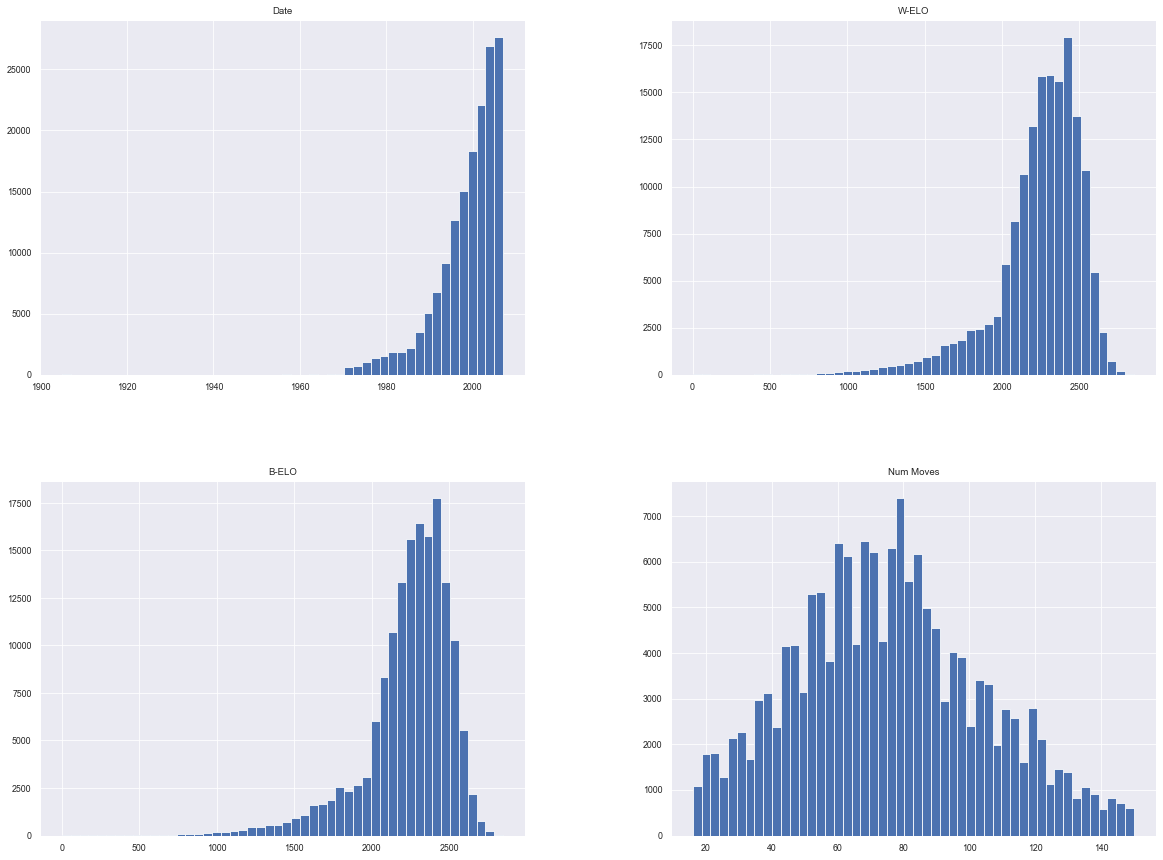

In [15]:
chess_data.hist(bins = 50, figsize = (20, 15))

array([[<AxesSubplot:xlabel='Date', ylabel='Date'>,
        <AxesSubplot:xlabel='W-ELO', ylabel='Date'>,
        <AxesSubplot:xlabel='B-ELO', ylabel='Date'>,
        <AxesSubplot:xlabel='Num Moves', ylabel='Date'>],
       [<AxesSubplot:xlabel='Date', ylabel='W-ELO'>,
        <AxesSubplot:xlabel='W-ELO', ylabel='W-ELO'>,
        <AxesSubplot:xlabel='B-ELO', ylabel='W-ELO'>,
        <AxesSubplot:xlabel='Num Moves', ylabel='W-ELO'>],
       [<AxesSubplot:xlabel='Date', ylabel='B-ELO'>,
        <AxesSubplot:xlabel='W-ELO', ylabel='B-ELO'>,
        <AxesSubplot:xlabel='B-ELO', ylabel='B-ELO'>,
        <AxesSubplot:xlabel='Num Moves', ylabel='B-ELO'>],
       [<AxesSubplot:xlabel='Date', ylabel='Num Moves'>,
        <AxesSubplot:xlabel='W-ELO', ylabel='Num Moves'>,
        <AxesSubplot:xlabel='B-ELO', ylabel='Num Moves'>,
        <AxesSubplot:xlabel='Num Moves', ylabel='Num Moves'>]],
      dtype=object)

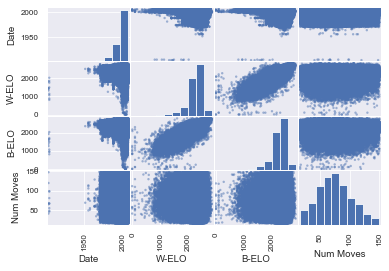

In [16]:
pd.plotting.scatter_matrix(chess_data)

<AxesSubplot:xlabel='Num Moves', ylabel='Count'>

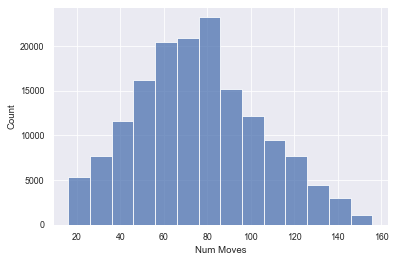

In [17]:
# creating a histogram to see what are the common number of moves for a game.
sns.histplot(data=chess_data,x=chess_data['Num Moves'],binwidth=10)